In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
from keras import layers, models
import os
import shutil

/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


# Save images for training

In [20]:
# Create empty folder
folder_path = "data/training_set_5000/"
if(os.path.exists(folder_path)):    
    shutil.rmtree(folder_path)
os.mkdir(folder_path)

data_path = "data/img_align_celeba/img_align_celeba/"

# Indicate loopable images
first_image = 1
last_image = 4000
dimensions = [128,128,3]
x_train = np.zeros((last_image - first_image+1, dimensions[0],dimensions[1],dimensions[2]))

# Resizing and rescaling
resize_and_scale = tf.keras.Sequential()
resize_and_scale.add(layers.Resizing(dimensions[0], dimensions[1]))
resize_and_scale.add(layers.Rescaling(1./255))


for it in range(first_image, last_image+1):
    filename = str(it).zfill(6) + ".jpg"
    image = plt.imread(data_path + filename)
    new_image = resize_and_scale(image)
    new_image = (2*new_image) - 1
    #x_train[it-1,:] = np.reshape(new_image, (dimensions[0]*dimensions[1]*dimensions[2]))
    x_train[it-1,:] = new_image

np.save(folder_path + "data",x_train)

In [8]:
from data_manipulation.faces import create_dataset

create_dataset("data/","faces_4000", "data/img_align_celeba/img_align_celeba/", 1, 4000)

(128, 128, 3)
-1.0 1.0


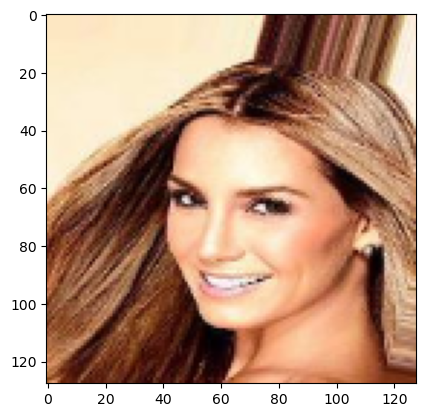

In [10]:
# Read image
data = np.load("data/faces_3000.npy")
image = data[0,:]
min_value = np.min(image)
max_value = np.max(image)
print(image.shape)
print(min_value, max_value)
plt.imshow((image+1)/2)

In [1]:
from models.face_model import build_generator

model = build_generator()
x = np.random.normal(0,1,(1,100))
y = model(x)
print(y.shape)

2023-10-09 11:52:12.066804: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

In [8]:
x_train = np.random.rand(4,8)

idx = np.random.randint(low=0, high=x_train.shape[0], size=3)
print(idx)

[2 3 2]


1/1 [==============================] - 2s 2s/step
(128, 128, 3)
-1.0 0.99999905


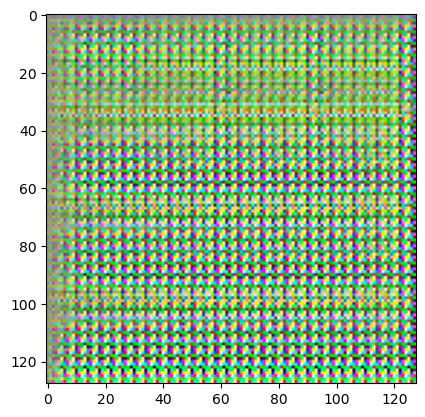

In [23]:
generator = models.load_model("saved_models/generator_200.h5")
input_size = 100
noise = np.random.normal(0,1,(1,input_size))
false_image = generator.predict(noise)[0]

min_value = np.min(false_image)
max_value = np.max(false_image)
print(false_image.shape)
print(min_value, max_value)
plt.imshow((false_image+1)/2)

(128, 128, 3)
-1.0 1.0


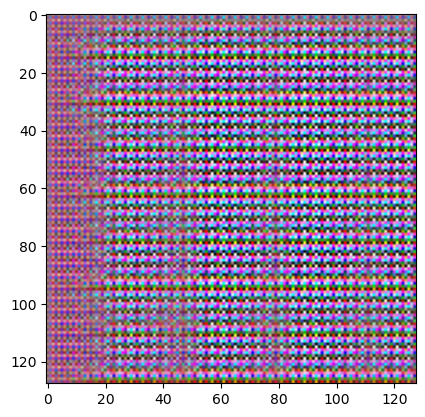

In [19]:
min_value = np.min(false_image)
max_value = np.max(false_image)
print(false_image.shape)
print(min_value, max_value)
plt.imshow((false_image+1)/2)

In [16]:
value = str.format("generator_{0}.h5",3)
print(value)

generator_3.h5
